In [1]:
#importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
# from imblearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(5, closed='left', min_periods=2).mean()
    group[new_cols] = rolling_stats
    group = group.drop(cols, axis=1)
    group = group.dropna(subset=new_cols)

    return group

# Dados jogo inteiro

In [4]:
#Networks

#ler csv

# -away
ager = pd.read_csv("analitics/network_Germany_away.csv")
aita = pd.read_csv("analitics/network_Italy_away.csv")
aeng = pd.read_csv("analitics/network_England_away.csv")
afra = pd.read_csv("analitics/network_France_away.csv")
aspa = pd.read_csv("analitics/network_Spain_away.csv")
aeur = pd.read_csv("analitics/network_European_Championship_away.csv")
acup = pd.read_csv("analitics/network_World_Cup_away.csv")

# -home
hger  = pd.read_csv("analitics/network_Germany_home.csv")
hita  = pd.read_csv("analitics/network_Italy_home.csv")
heng  = pd.read_csv("analitics/network_England_home.csv")
hfra  = pd.read_csv("analitics/network_France_home.csv")
hspa  = pd.read_csv("analitics/network_Spain_home.csv")
heur  = pd.read_csv("analitics/network_European_Championship_home.csv")
hcup  = pd.read_csv("analitics/network_World_Cup_home.csv")



In [5]:
#cria média dos jogos do time em casa

cols = ['avg_closeness_centrality_T1', 'std_closeness_centrality_T1', 'min_closeness_centrality_T1', 'max_closeness_centrality_T1', 'avg_degree_centrality_T1',
        'std_degree_centrality_T1', 'min_degree_centrality_T1', 'max_degree_centrality_T1', 'avg_betweenness_centrality_T1', 'std_betweenness_centrality_T1', 
        'min_betweenness_centrality_T1', 'max_betweenness_centrality_T1', 'avg_eigenvector_centrality_T1', 'std_eigenvector_centrality_T1', 'min_eigenvector_centrality_T1',
        'max_eigenvector_centrality_T1', 'avg_clustering_T1', 'std_clustering_T1', 'min_clustering_T1', 'max_clustering_T1', 'avg_shortest_path_T1', 'mean_centroid_y_T1', 
        'std_centroid_y_T1', 'mean_centroid_x_T1', 'std_centroid_x_T1']
new_cols = [f"avg_{c}" for c in cols]

heng = heng.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heng = heng.droplevel('team1_ID')
hger = hger.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hger = hger.droplevel('team1_ID')
hita = hita.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hita = hita.droplevel('team1_ID')
hfra = hfra.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hfra = hfra.droplevel('team1_ID')
hspa = hspa.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hspa = hspa.droplevel('team1_ID')
heur = heur.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heur = heur.droplevel('team1_ID')
hcup = hcup.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hcup = hcup.droplevel('team1_ID')

In [6]:
#cria média dos jogos do time fora de casa

cols = ['avg_closeness_centrality_T2', 'std_closeness_centrality_T2', 'min_closeness_centrality_T2', 'max_closeness_centrality_T2', 'avg_degree_centrality_T2',
        'std_degree_centrality_T2', 'min_degree_centrality_T2', 'max_degree_centrality_T2', 'avg_betweenness_centrality_T2', 'std_betweenness_centrality_T2', 
        'min_betweenness_centrality_T2', 'max_betweenness_centrality_T2', 'avg_eigenvector_centrality_T2', 'std_eigenvector_centrality_T2', 'min_eigenvector_centrality_T2',
        'max_eigenvector_centrality_T2', 'avg_clustering_T2', 'std_clustering_T2', 'min_clustering_T2', 'max_clustering_T2','avg_shortest_path_T2', 'mean_centroid_y_T2', 
        'std_centroid_y_T2', 'mean_centroid_x_T2', 'std_centroid_x_T2']
new_cols = [f"avg_{c}" for c in cols]

aeng = aeng.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeng = aeng.droplevel('team2_ID')
ager = ager.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
ager = ager.droplevel('team2_ID')
aita = aita.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aita = aita.droplevel('team2_ID')
afra = afra.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
afra = afra.droplevel('team2_ID')
aspa = aspa.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aspa = aspa.droplevel('team2_ID')
aeur = aeur.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeur = aeur.droplevel('team2_ID')
acup = acup.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
acup = acup.droplevel('team2_ID')

In [7]:
#junta df home com df away
avg_ger = hger.merge(ager, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_ita = hita.merge(aita, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eng = heng.merge(aeng, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_fra = hfra.merge(afra, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_spa = hspa.merge(aspa, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eur = heur.merge(aeur, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_cup = hcup.merge(acup, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])


In [277]:
#salva em csv
avg_ger.to_csv('rolling_avg/net_avg_ger.csv', encoding='utf-8', index=False)
avg_ita.to_csv('rolling_avg/net_avg_ita.csv', encoding='utf-8', index=False)
avg_eng.to_csv('rolling_avg/net_avg_eng.csv', encoding='utf-8', index=False)
avg_fra.to_csv('rolling_avg/net_avg_fra.csv', encoding='utf-8', index=False)
avg_spa.to_csv('rolling_avg/net_avg_spa.csv', encoding='utf-8', index=False)
avg_eur.to_csv('rolling_avg/net_avg_eur.csv', encoding='utf-8', index=False)
avg_cup.to_csv('rolling_avg/net_avg_cup.csv', encoding='utf-8', index=False)

In [8]:
avg_df = pd.concat([avg_ger, avg_ita, avg_eng, avg_fra, avg_spa, avg_eur, avg_cup], ignore_index=True)

In [9]:
avg_df.groupby('tournament').count()

,matchID,team1_ID,team2_ID,date,winner,avg_avg_closeness_centrality_T1,avg_std_closeness_centrality_T1,avg_min_closeness_centrality_T1,avg_max_closeness_centrality_T1,avg_avg_degree_centrality_T1,avg_std_degree_centrality_T1,avg_min_degree_centrality_T1,avg_max_degree_centrality_T1,avg_avg_betweenness_centrality_T1,avg_std_betweenness_centrality_T1,avg_min_betweenness_centrality_T1,avg_max_betweenness_centrality_T1,avg_avg_eigenvector_centrality_T1,avg_std_eigenvector_centrality_T1,avg_min_eigenvector_centrality_T1,avg_max_eigenvector_centrality_T1,avg_avg_clustering_T1,avg_std_clustering_T1,avg_min_clustering_T1,avg_max_clustering_T1,avg_avg_shortest_path_T1,avg_mean_centroid_y_T1,avg_std_centroid_y_T1,avg_mean_centroid_x_T1,avg_std_centroid_x_T1,avg_avg_closeness_centrality_T2,avg_std_closeness_centrality_T2,avg_min_closeness_centrality_T2,avg_max_closeness_centrality_T2,avg_avg_degree_centrality_T2,avg_std_degree_centrality_T2,avg_min_degree_centrality_T2,avg_max_degree_centrality_T2,avg_avg_betweenness_centrality_T2,avg_std_betweenness_centrality_T2,avg_min_betweenness_centrality_T2,avg_max_betweenness_centrality_T2,avg_avg_eigenvector_centrality_T2,avg_std_eigenvector_centrality_T2,avg_min_eigenvector_centrality_T2,avg_max_eigenvector_centrality_T2,avg_avg_clustering_T2,avg_std_clustering_T2,avg_min_clustering_T2,avg_max_clustering_T2,avg_avg_shortest_path_T2,avg_mean_centroid_y_T2,avg_std_centroid_y_T2,avg_mean_centroid_x_T2,avg_std_centroid_x_T2
tournament,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
England,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
European_Championship,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
France,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
Germany,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181
Italy,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250
Spain,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245
World_Cup,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [10]:
# Jogo inteiro

#Separando dados e target
X = avg_df.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_df['winner'] 
col_names = X.columns
idx = avg_df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(XScaled,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)


# Dados jogo por tempo

In [11]:
#Networks

#ler csv

# -away - 1H
ager_1h = pd.read_csv("analitics/network_Germany_away_1h.csv")
aita_1h = pd.read_csv("analitics/network_Italy_away_1h.csv")
aeng_1h = pd.read_csv("analitics/network_England_away_1h.csv")
afra_1h = pd.read_csv("analitics/network_France_away_1h.csv")
aspa_1h = pd.read_csv("analitics/network_Spain_away_1h.csv")
aeur_1h = pd.read_csv("analitics/network_European_Championship_away_1h.csv")
acup_1h = pd.read_csv("analitics/network_World_Cup_away_1h.csv")

# -away - 2H
ager_2h = pd.read_csv("analitics/network_Germany_away_2h.csv")
aita_2h = pd.read_csv("analitics/network_Italy_away_2h.csv")
aeng_2h = pd.read_csv("analitics/network_England_away_2h.csv")
afra_2h = pd.read_csv("analitics/network_France_away_2h.csv")
aspa_2h = pd.read_csv("analitics/network_Spain_away_2h.csv")
aeur_2h = pd.read_csv("analitics/network_European_Championship_away_2h.csv")
acup_2h = pd.read_csv("analitics/network_World_Cup_away_2h.csv")

# -home - 1H
hger_1h  = pd.read_csv("analitics/network_Germany_home_1h.csv")
hita_1h  = pd.read_csv("analitics/network_Italy_home_1h.csv")
heng_1h  = pd.read_csv("analitics/network_England_home_1h.csv")
hfra_1h  = pd.read_csv("analitics/network_France_home_1h.csv")
hspa_1h  = pd.read_csv("analitics/network_Spain_home_1h.csv")
heur_1h  = pd.read_csv("analitics/network_European_Championship_home_1h.csv")
hcup_1h  = pd.read_csv("analitics/network_World_Cup_home_1h.csv")

# -home - 2H
hger_2h = pd.read_csv("analitics/network_Germany_home_2h.csv")
hita_2h = pd.read_csv("analitics/network_Italy_home_2h.csv")
heng_2h = pd.read_csv("analitics/network_England_home_2h.csv")
hfra_2h = pd.read_csv("analitics/network_France_home_2h.csv")
hspa_2h = pd.read_csv("analitics/network_Spain_home_2h.csv")
heur_2h = pd.read_csv("analitics/network_European_Championship_home_2h.csv")
hcup_2h = pd.read_csv("analitics/network_World_Cup_home_2h.csv")



In [12]:
#cria média dos jogos do time em casa

#1H
cols = ['avg_closeness_centrality_T1', 'std_closeness_centrality_T1', 'min_closeness_centrality_T1', 'max_closeness_centrality_T1', 'avg_degree_centrality_T1',
        'std_degree_centrality_T1', 'min_degree_centrality_T1', 'max_degree_centrality_T1', 'avg_betweenness_centrality_T1', 'std_betweenness_centrality_T1', 
        'min_betweenness_centrality_T1', 'max_betweenness_centrality_T1', 'avg_eigenvector_centrality_T1', 'std_eigenvector_centrality_T1', 'min_eigenvector_centrality_T1',
        'max_eigenvector_centrality_T1', 'avg_clustering_T1', 'std_clustering_T1', 'min_clustering_T1', 'max_clustering_T1', 'avg_shortest_path_T1', 'mean_centroid_y_T1', 
        'std_centroid_y_T1', 'mean_centroid_x_T1', 'std_centroid_x_T1']
new_cols = [f"avg_{c}_1H" for c in cols]

heng_1h = heng_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heng_1h = heng_1h.droplevel('team1_ID')
hger_1h = hger_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hger_1h = hger_1h.droplevel('team1_ID')
hita_1h = hita_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hita_1h = hita_1h.droplevel('team1_ID')
hfra_1h = hfra_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hfra_1h = hfra_1h.droplevel('team1_ID')
hspa_1h = hspa_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hspa_1h = hspa_1h.droplevel('team1_ID')
heur_1h = heur_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heur_1h = heur_1h.droplevel('team1_ID')
hcup_1h = hcup_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hcup_1h = hcup_1h.droplevel('team1_ID')

#2H
new_cols = [f"avg_{c}_2H" for c in cols]

heng_2h = heng_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heng_2h = heng_2h.droplevel('team1_ID')
hger_2h = hger_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hger_2h = hger_2h.droplevel('team1_ID')
hita_2h = hita_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hita_2h = hita_2h.droplevel('team1_ID')
hfra_2h = hfra_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hfra_2h = hfra_2h.droplevel('team1_ID')
hspa_2h = hspa_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hspa_2h = hspa_2h.droplevel('team1_ID')
heur_2h = heur_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heur_2h = heur_2h.droplevel('team1_ID')
hcup_2h = hcup_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hcup_2h = hcup_2h.droplevel('team1_ID')

In [13]:
#cria média dos jogos do time fora de casa

cols = ['avg_closeness_centrality_T2', 'std_closeness_centrality_T2', 'min_closeness_centrality_T2', 'max_closeness_centrality_T2', 'avg_degree_centrality_T2',
        'std_degree_centrality_T2', 'min_degree_centrality_T2', 'max_degree_centrality_T2', 'avg_betweenness_centrality_T2', 'std_betweenness_centrality_T2', 
        'min_betweenness_centrality_T2', 'max_betweenness_centrality_T2', 'avg_eigenvector_centrality_T2', 'std_eigenvector_centrality_T2', 'min_eigenvector_centrality_T2',
        'max_eigenvector_centrality_T2', 'avg_clustering_T2', 'std_clustering_T2', 'min_clustering_T2', 'max_clustering_T2','avg_shortest_path_T2', 'mean_centroid_y_T2', 
        'std_centroid_y_T2', 'mean_centroid_x_T2', 'std_centroid_x_T2']
new_cols = [f"avg_{c}_1H" for c in cols]

aeng_1h = aeng_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeng_1h = aeng_1h.droplevel('team2_ID')
ager_1h = ager_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
ager_1h = ager_1h.droplevel('team2_ID')
aita_1h = aita_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aita_1h = aita_1h.droplevel('team2_ID')
afra_1h = afra_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
afra_1h = afra_1h.droplevel('team2_ID')
aspa_1h = aspa_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aspa_1h = aspa_1h.droplevel('team2_ID')
aeur_1h = aeur_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeur_1h = aeur_1h.droplevel('team2_ID')
acup_1h = acup_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
acup_1h = acup_1h.droplevel('team2_ID')

#2H
new_cols = [f"avg_{c}_2H" for c in cols]

aeng_2h = aeng_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeng_2h = aeng_2h.droplevel('team2_ID')
ager_2h = ager_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
ager_2h = ager_2h.droplevel('team2_ID')
aita_2h = aita_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aita_2h = aita_2h.droplevel('team2_ID')
afra_2h = afra_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
afra_2h = afra_2h.droplevel('team2_ID')
aspa_2h = aspa_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aspa_2h = aspa_2h.droplevel('team2_ID')
aeur_2h = aeur_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeur_2h = aeur_2h.droplevel('team2_ID')
acup_2h = acup_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
acup_2h = acup_2h.droplevel('team2_ID')

In [14]:
#junta primeiro com segundo tempo
hger_t = hger_1h.merge(hger_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
hita_t = hita_1h.merge(hita_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
heng_t = heng_1h.merge(heng_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
hfra_t = hfra_1h.merge(hfra_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
hspa_t = hspa_1h.merge(hspa_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
heur_t = heur_1h.merge(heur_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
hcup_t = hcup_1h.merge(hcup_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])

ager_t = ager_1h.merge(ager_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
aita_t = aita_1h.merge(aita_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
aeng_t = aeng_1h.merge(aeng_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
afra_t = afra_1h.merge(afra_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
aspa_t = aspa_1h.merge(aspa_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
aeur_t = aeur_1h.merge(aeur_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
acup_t = acup_1h.merge(acup_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])

In [15]:
#junta df home com df away
avg_ger_t = hger_t.merge(ager_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_ita_t = hita_t.merge(aita_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eng_t = heng_t.merge(aeng_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_fra_t = hfra_t.merge(afra_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_spa_t = hspa_t.merge(aspa_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eur_t = heur_t.merge(aeur_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_cup_t = hcup_t.merge(acup_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])


In [288]:
#salva em csv
avg_ger_t.to_csv('rolling_avg/net_avg_ger_half.csv', encoding='utf-8', index=False)
avg_ita_t.to_csv('rolling_avg/net_avg_ita_half.csv', encoding='utf-8', index=False)
avg_eng_t.to_csv('rolling_avg/net_avg_eng_half.csv', encoding='utf-8', index=False)
avg_fra_t.to_csv('rolling_avg/net_avg_fra_half.csv', encoding='utf-8', index=False)
avg_spa_t.to_csv('rolling_avg/net_avg_spa_half.csv', encoding='utf-8', index=False)
avg_eur_t.to_csv('rolling_avg/net_avg_eur_half.csv', encoding='utf-8', index=False)
avg_cup_t.to_csv('rolling_avg/net_avg_cup_half.csv', encoding='utf-8', index=False)

In [16]:
avg_df_t = pd.concat([avg_ger_t, avg_ita_t, avg_eng_t, avg_fra_t, avg_spa_t, avg_eur_t, avg_cup_t], ignore_index=True)

In [17]:
avg_df_t.groupby('tournament').count()

,matchID,team1_ID,team2_ID,date,winner,avg_avg_closeness_centrality_T1_1H,avg_std_closeness_centrality_T1_1H,avg_min_closeness_centrality_T1_1H,avg_max_closeness_centrality_T1_1H,avg_avg_degree_centrality_T1_1H,avg_std_degree_centrality_T1_1H,avg_min_degree_centrality_T1_1H,avg_max_degree_centrality_T1_1H,avg_avg_betweenness_centrality_T1_1H,avg_std_betweenness_centrality_T1_1H,avg_min_betweenness_centrality_T1_1H,avg_max_betweenness_centrality_T1_1H,avg_avg_eigenvector_centrality_T1_1H,avg_std_eigenvector_centrality_T1_1H,avg_min_eigenvector_centrality_T1_1H,avg_max_eigenvector_centrality_T1_1H,avg_avg_clustering_T1_1H,avg_std_clustering_T1_1H,avg_min_clustering_T1_1H,avg_max_clustering_T1_1H,avg_avg_shortest_path_T1_1H,avg_mean_centroid_y_T1_1H,avg_std_centroid_y_T1_1H,avg_mean_centroid_x_T1_1H,avg_std_centroid_x_T1_1H,avg_avg_closeness_centrality_T1_2H,avg_std_closeness_centrality_T1_2H,avg_min_closeness_centrality_T1_2H,avg_max_closeness_centrality_T1_2H,avg_avg_degree_centrality_T1_2H,avg_std_degree_centrality_T1_2H,avg_min_degree_centrality_T1_2H,avg_max_degree_centrality_T1_2H,avg_avg_betweenness_centrality_T1_2H,avg_std_betweenness_centrality_T1_2H,avg_min_betweenness_centrality_T1_2H,avg_max_betweenness_centrality_T1_2H,avg_avg_eigenvector_centrality_T1_2H,avg_std_eigenvector_centrality_T1_2H,avg_min_eigenvector_centrality_T1_2H,avg_max_eigenvector_centrality_T1_2H,avg_avg_clustering_T1_2H,avg_std_clustering_T1_2H,avg_min_clustering_T1_2H,avg_max_clustering_T1_2H,avg_avg_shortest_path_T1_2H,avg_mean_centroid_y_T1_2H,avg_std_centroid_y_T1_2H,avg_mean_centroid_x_T1_2H,avg_std_centroid_x_T1_2H,avg_avg_closeness_centrality_T2_1H,avg_std_closeness_centrality_T2_1H,avg_min_closeness_centrality_T2_1H,avg_max_closeness_centrality_T2_1H,avg_avg_degree_centrality_T2_1H,avg_std_degree_centrality_T2_1H,avg_min_degree_centrality_T2_1H,avg_max_degree_centrality_T2_1H,avg_avg_betweenness_centrality_T2_1H,avg_std_betweenness_centrality_T2_1H,avg_min_betweenness_centrality_T2_1H,avg_max_betweenness_centrality_T2_1H,avg_avg_eigenvector_centrality_T2_1H,avg_std_eigenvector_centrality_T2_1H,avg_min_eigenvector_centrality_T2_1H,avg_max_eigenvector_centrality_T2_1H,avg_avg_clustering_T2_1H,avg_std_clustering_T2_1H,avg_min_clustering_T2_1H,avg_max_clustering_T2_1H,avg_avg_shortest_path_T2_1H,avg_mean_centroid_y_T2_1H,avg_std_centroid_y_T2_1H,avg_mean_centroid_x_T2_1H,avg_std_centroid_x_T2_1H,avg_avg_closeness_centrality_T2_2H,avg_std_closeness_centrality_T2_2H,avg_min_closeness_centrality_T2_2H,avg_max_closeness_centrality_T2_2H,avg_avg_degree_centrality_T2_2H,avg_std_degree_centrality_T2_2H,avg_min_degree_centrality_T2_2H,avg_max_degree_centrality_T2_2H,avg_avg_betweenness_centrality_T2_2H,avg_std_betweenness_centrality_T2_2H,avg_min_betweenness_centrality_T2_2H,avg_max_betweenness_centrality_T2_2H,avg_avg_eigenvector_centrality_T2_2H,avg_std_eigenvector_centrality_T2_2H,avg_min_eigenvector_centrality_T2_2H,avg_max_eigenvector_centrality_T2_2H,avg_avg_clustering_T2_2H,avg_std_clustering_T2_2H,avg_min_clustering_T2_2H,avg_max_clustering_T2_2H,avg_avg_shortest_path_T2_2H,avg_mean_centroid_y_T2_2H,avg_std_centroid_y_T2_2H,avg_mean_centroid_x_T2_2H,avg_std_centroid_x_T2_2H
tournament,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
England,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
European_Championship,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
France,23

In [18]:
# Separado 1H e 2H

#Separando dados e target
X_t = avg_df_t.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y_t = avg_df_t['winner'] 
col_names = X_t.columns
idx_t = avg_df_t['matchID']

#Normalizando os dados
XScaled_t = StandardScaler().fit_transform(X_t)

#Separando treino e teste
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(XScaled_t,
                                                    y_t.values,
                                                    stratify= y_t.values,
                                                    test_size=0.3,
                                                    random_state=42)


# Modelagem

## Setup

In [19]:
#Métricas de avaliação
def evaluation_metrics(clf,test_x, test_y, pred_y, ax_1, ax_2):
    accuracy = accuracy_score(test_y, pred_y)
    precision = precision_score(test_y, pred_y)
    recall = recall_score(test_y, pred_y)
    f1 = f1_score(test_y, pred_y)
        
    plot_precision_recall_curve(clf, test_x, test_y, ax=ax_1)
    plot_roc_curve(clf, test_x, test_y, ax=ax_2)
    
    return accuracy, precision, recall, f1

In [25]:
def logistic_regression(train_x, train_y):
    #Achando melhores hiperparâmetros com hyperopt para logistic regression
           
    #Define Parameter Space for Optimization
    space = {
        'C': hp.choice('C', [0.001, 0.01, 0.1, 1, 10, 100, 1000]),
        'penalty': hp.choice('penalty', ['l1', 'l2']),
        'max_iter': hp.quniform('max_iter', 100, 700, 100),
        'solver': hp.choice('solver', ['liblinear', 'saga']), #tirei 'lbfgs' e'sag' pq não funciona com l1
        'class_weight' : hp.choice('class_weight', ['balanced', None])
    }

    #Defining a Function to Minimize (Objective Function)
    def hyperparameter_tuning(params):
        clf = LogisticRegression(**params, random_state=42, n_jobs=-1)
        f1 = cross_val_score(clf, train_x, train_y, cv=10, scoring='f1', error_score='raise').mean()
        
        return {"loss": -f1, "status": STATUS_OK}

    # Fine Tune the Model
    trials = Trials()

    best = fmin(
        fn=hyperparameter_tuning,
        space = space, 
        algo=tpe.suggest, 
        max_evals=20, 
        trials=trials
    )

    print("Logistic Regression - Best: {}".format(best))
    
    logi = LogisticRegression(
        C=[0.001, 0.01, 0.1, 1, 10, 100, 1000][best['C']],
        penalty=['l1', 'l2'][best['penalty']], 
        solver=['liblinear', 'saga'][best['solver']], 
        max_iter=best['max_iter'], 
        class_weight=['balanced', None][best['class_weight']])

    return logi

In [21]:
def random_forest(train_x, train_y):
    #Achando melhores hiperparâmetros com hyperopt para Random Forest

    #Define Parameter Space for Optimization
    space = {
        "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500]),
        "max_depth": hp.quniform("max_depth", 2, 24, 2),
        "max_features": hp.choice("max_features", ['auto', 'sqrt', 'log2']),
        "criterion": hp.choice("criterion", ["gini", "entropy"]),
        "min_samples_leaf":hp.choice("min_samples_leaf", [1, 2, 3, 4, 5]),
        "min_samples_split":hp.choice("min_samples_split", [2, 3, 4, 5, 6]),
        "class_weight": hp.choice("class_weight", ['balanced', 'balanced_subsample', None]),
        "bootstrap": hp.choice("bootstrap", [True, False])
    }

    #Defining a Function to Minimize (Objective Function)
    def hyperparameter_tuning(params):
        model = RandomForestClassifier(**params, n_jobs=-1)
        f1 = cross_val_score(model, train_x, train_y, cv = 10, scoring='accuracy', error_score='raise').mean()
        
        return {"loss": -f1, "status": STATUS_OK}

    # Fine Tune the Model
    trials = Trials()

    best = fmin(
        fn=hyperparameter_tuning,
        space = space, 
        algo=tpe.suggest, 
        max_evals=20, 
        trials=trials
    )
    print(" Random Forest - Best: {}".format(best))


    rf = RandomForestClassifier(
        n_estimators=[100, 200, 300, 400,500][3],
        max_depth=best['max_depth'],
        max_features=['auto', 'sqrt', 'log2'][best['max_features']],
        criterion=["gini", "entropy"][best['criterion']],
        min_samples_leaf=[1, 2, 3, 4, 5][best['min_samples_leaf']],
        min_samples_split=[2, 3, 4, 5, 6][best['min_samples_split']],
        random_state=42,
        class_weight=['balanced', 'balanced_subsample', None][best['class_weight']],
        bootstrap=[True, False][best['bootstrap']],
        n_jobs = -1)

    return rf

In [22]:
def xgboosting(train_x, train_y):
    #Achando melhores hiperparâmetros com hyperopt para XGBoosting

    #Define Parameter Space for Optimization
    space = {
    'max_depth' : hp.choice('max_depth', range(5, 15, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(50, 400, 10)),
    'gamma' : hp.quniform('gamma', 0, 0.30, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.05),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'scale_pos_weight' : hp.choice('scale_pos_weight', range(4, 25, 1)),
    }

    #Defining a Function to Minimize (Objective Function)
    def hyperparameter_tuning(params):
        clf = XGBClassifier(**params, random_state=42, verbosity=0, objective= 'binary:logistic', n_jobs=-1)
        f1 = cross_val_score(clf, train_x, train_y, cv=10, scoring='accuracy').mean()
        
        return {"loss": -f1, "status": STATUS_OK}

    # Fine Tune the Model
    trials = Trials()

    best = fmin(
        fn=hyperparameter_tuning,
        space = space, 
        algo=tpe.suggest, 
        max_evals=20, 
        trials=trials
    )
    print("XGBoosting - Best: {}".format(best))

    xgb = XGBClassifier(
        learning_rate=best['learning_rate'],
        n_estimators=range(50, 400, 10)[best['n_estimators']],
        max_depth=range(5, 15, 1)[best['max_depth']],
        min_child_weight=best['min_child_weight'],
        gamma=best['gamma'],
        subsample=best['subsample'],
        colsample_bytree=best['colsample_bytree'],
        objective= 'binary:logistic',
        scale_pos_weight=range(4, 25, 1)[best['scale_pos_weight']])

    return xgb

In [23]:
def testa_modelos(train_x, train_y, test_x, test_y):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))

    logi = logistic_regression(train_x, train_y)
    rf = random_forest(train_x, train_y)
    xgb = xgboosting(train_x, train_y)

    for clf, name in [(logi, 'LogisticRegression'),
                      (rf, 'RandomForest'),
                      (xgb, 'XGBClassifier')]:
        
        cv = cross_val_score(clf,train_x,train_y, cv = 10 , scoring='accuracy')
        CrossValMean = cv.mean()
        CrossValSTD = cv.std()
        print("")
        print(f"{name}:")
        print(f"CrossVal (mean/std): {100*CrossValMean:.3f}% / {100*CrossValSTD:.3f}%")
        
        clf.fit(train_x, train_y)
        y_pred = clf.predict(test_x)

        accuracy, precision, recall, f1 = evaluation_metrics(clf, test_x, test_y, y_pred, ax1, ax2)
        print(f"accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
    
    ax1.legend(loc="right")
    ax1.set_title('Precision-Recall curve')
    
    ax2.legend(loc="right")
    ax2.set_title('ROC AUC curve')

## Por jogo inteiro

100%|██████████| 20/20 [00:33<00:00,  1.65s/trial, best loss: -0.7454890669353545]
Logistic Regression - Best: {'C': 2, 'class_weight': 1, 'max_iter': 400.0, 'penalty': 0, 'solver': 1}
100%|██████████| 20/20 [01:34<00:00,  4.70s/trial, best loss: -0.6758333333333334]
 Random Forest - Best: {'bootstrap': 0, 'class_weight': 1, 'criterion': 1, 'max_depth': 8.0, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 1}
100%|██████████| 20/20 [00:41<00:00,  2.06s/trial, best loss: -0.6670216049382716]
XGBoosting - Best: {'colsample_bytree': 0.63, 'gamma': 0.13, 'learning_rate': 0.19, 'max_depth': 0, 'min_child_weight': 2.0, 'n_estimators': 20, 'scale_pos_weight': 17, 'subsample': 0.9}

LogisticRegression:
CrossVal (mean/std): 65.090% / 7.111%
accuracy: 65.99% | precision: 67.95% | recall: 83.81% | f1: 75.05%

RandomForest:
CrossVal (mean/std): 66.458% / 5.465%
accuracy: 68.02% | precision: 72.12% | recall: 77.62% | f1: 74.77%

XGBClassifier:
CrossVal (mean/std): 6

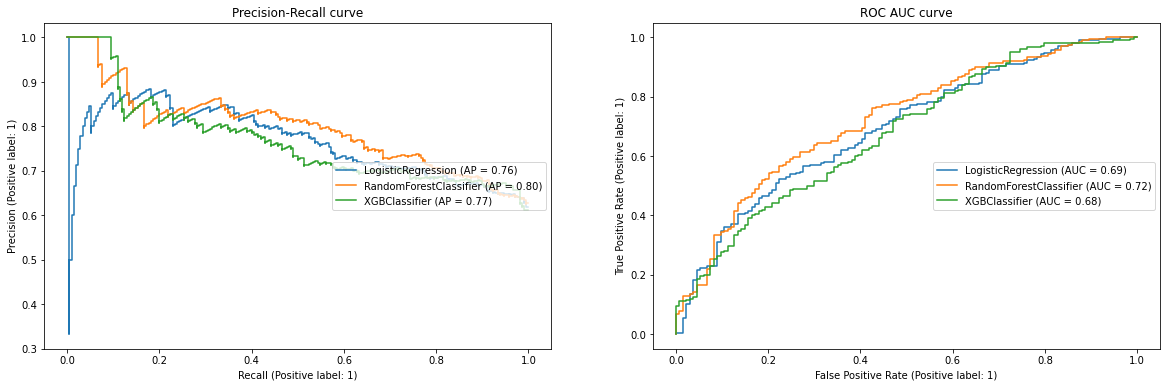

In [26]:
testa_modelos(X_train, y_train, X_test, y_test)

In [298]:
#Achando melhores hiperparâmetros com hyperopt para logistic regression
           
#Define Parameter Space for Optimization
space = {
    'C': hp.choice('C', [0.001, 0.01, 0.1, 1, 10, 100, 1000]),
    'penalty': hp.choice('penalty', ['l1']),
    'max_iter': hp.quniform('max_iter', 100, 700, 100),
    'solver': hp.choice('solver', ['liblinear', 'saga']), #tirei 'lbfgs' e'sag' pq não funciona com l1
    'class_weight' : hp.choice('class_weight', ['balanced', None])
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    clf = LogisticRegression(**params, random_state=42, n_jobs=-1)
    f1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy', error_score='raise').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=20, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 10/10 [00:45<00:00,  4.58s/trial, best loss: -0.7565862124906555]
Best: {'C': 1, 'class_weight': 1, 'max_iter': 600.0, 'penalty': 0, 'solver': 1}


In [299]:
#Achando melhores hiperparâmetros com hyperopt para Random Forest

#Define Parameter Space for Optimization
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500]),
    "max_depth": hp.quniform("max_depth", 2, 24, 2),
    "max_features": hp.choice("max_features", ['auto', 'sqrt', 'log2']),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "min_samples_leaf":hp.choice("min_samples_leaf", [1, 2, 3, 4, 5]),
    "min_samples_split":hp.choice("min_samples_split", [2, 3, 4, 5, 6]),
    "class_weight": hp.choice("class_weight", ['balanced', 'balanced_subsample', None]),
    "bootstrap": hp.choice("bootstrap", [True, False])
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    model = RandomForestClassifier(**params, n_jobs=-1)
    f1 = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy', error_score='raise').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=20, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 20/20 [02:19<00:00,  6.98s/trial, best loss: -0.678395061728395] 
Best: {'bootstrap': 0, 'class_weight': 1, 'criterion': 1, 'max_depth': 10.0, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 1, 'n_estimators': 1}


CrossValMean: 0.6683641975308643
CrossValSTD: 0.05649261173474555
accuracy: 69.19% | precision: 72.22% | recall: 80.48% | f1: 76.13%


Text(0.5, 1.0, 'ROC AUC curve')

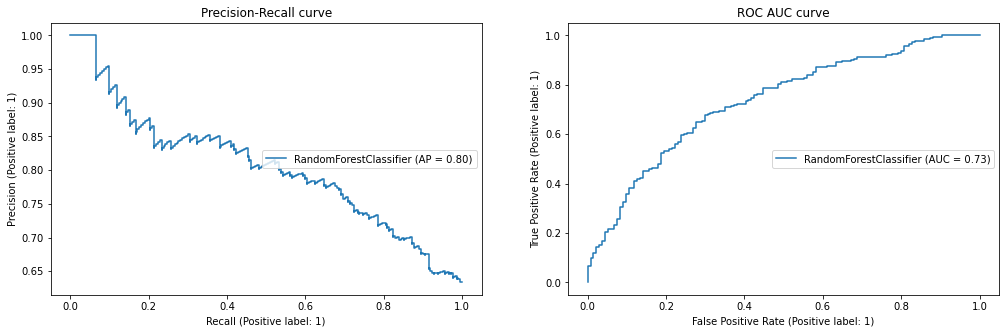

In [300]:
clf = RandomForestClassifier(
    n_estimators=[100, 200, 300, 400,500][3],
    max_depth=best['max_depth'],
    max_features=['auto', 'sqrt', 'log2'][best['max_features']],
    criterion=["gini", "entropy"][best['criterion']],
    min_samples_leaf=[1, 2, 3, 4, 5][best['min_samples_leaf']],
    min_samples_split=[2, 3, 4, 5, 6][best['min_samples_split']],
    random_state=42,
    class_weight=['balanced', 'balanced_subsample', None][best['class_weight']],
    bootstrap=[True, False][best['bootstrap']],
    n_jobs = -1)

cv = cross_val_score(clf,X_train,y_train, cv = 10 , scoring='accuracy')

CrossValMean = cv.mean()
print("CrossValMean:", CrossValMean)
CrossValSTD = cv.std()
print("CrossValSTD:", CrossValSTD)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,5))
accuracy, precision, recall, f1 = evaluation_metrics(clf, X_test ,y_test, y_pred, ax1, ax2)
print(f"accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
ax1.legend(loc="right")
ax1.set_title('Precision-Recall curve')

ax2.legend(loc="right")
ax2.set_title('ROC AUC curve')

In [301]:
#Achando melhores hiperparâmetros com hyperopt para XGBoosting

#Define Parameter Space for Optimization
space = {
 'max_depth' : hp.choice('max_depth', range(5, 15, 1)),
 'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
 'n_estimators' : hp.choice('n_estimators', range(50, 400, 10)),
 'gamma' : hp.quniform('gamma', 0, 0.30, 0.01),
 'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
 'subsample' : hp.quniform('subsample', 0.1, 1, 0.05),
 'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
 'scale_pos_weight' : hp.choice('scale_pos_weight', range(4, 25, 1)),
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    clf = XGBClassifier(**params, random_state=42, verbosity=0, objective= 'binary:logistic', n_jobs=-1)
    f1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=20, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 20/20 [01:09<00:00,  3.47s/trial, best loss: -0.6595216049382715]
Best: {'colsample_bytree': 0.38, 'gamma': 0.08, 'learning_rate': 0.09, 'max_depth': 7, 'min_child_weight': 3.0, 'n_estimators': 6, 'scale_pos_weight': 19, 'subsample': 0.8500000000000001}


CrossValMean: 0.6409006211180124
CrossValSTD: 0.019112040064354026
accuracy: 65.99% | precision: 64.76% | recall: 97.14% | f1: 77.71%


Text(0.5, 1.0, 'ROC AUC curve')

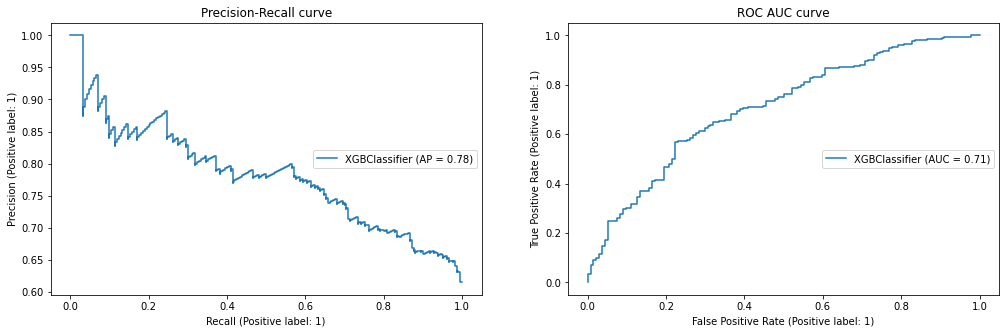

In [302]:
clf = XGBClassifier(
    learning_rate=best['learning_rate'],
    n_estimators=range(50, 400, 10)[best['n_estimators']],
    max_depth=range(5, 15, 1)[best['max_depth']],
    min_child_weight=best['min_child_weight'],
    gamma=best['gamma'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    objective= 'binary:logistic',
    scale_pos_weight=range(4, 25, 1)[best['scale_pos_weight']])

cv = cross_val_score(clf,X_train,y_train, cv = 5 , scoring='accuracy')

CrossValMean = cv.mean()
print("CrossValMean:", CrossValMean)
CrossValSTD = cv.std()
print("CrossValSTD:", CrossValSTD)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,5))
accuracy, precision, recall, f1 = evaluation_metrics(clf, X_test ,y_test, y_pred, ax1, ax2)
print(f"accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
ax1.legend(loc="right")
ax1.set_title('Precision-Recall curve')

ax2.legend(loc="right")
ax2.set_title('ROC AUC curve')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

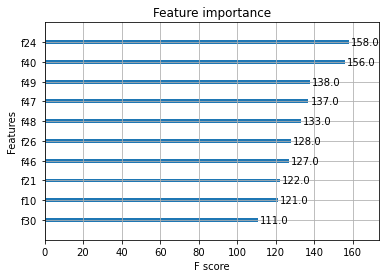

In [303]:
#Feature importance do modelo escolhido
plot_importance(clf, max_num_features = 10)

#arrumar labels

## Por divisão de tempo

RandomForest: accuracy: 65.99% | precision: 71.23% | recall: 74.29% | f1: 72.73%
LogisticRegression: accuracy: 63.08% | precision: 74.27% | recall: 60.48% | f1: 66.67%
XGBClassifier: accuracy: 66.28% | precision: 64.78% | recall: 98.10% | f1: 78.03%


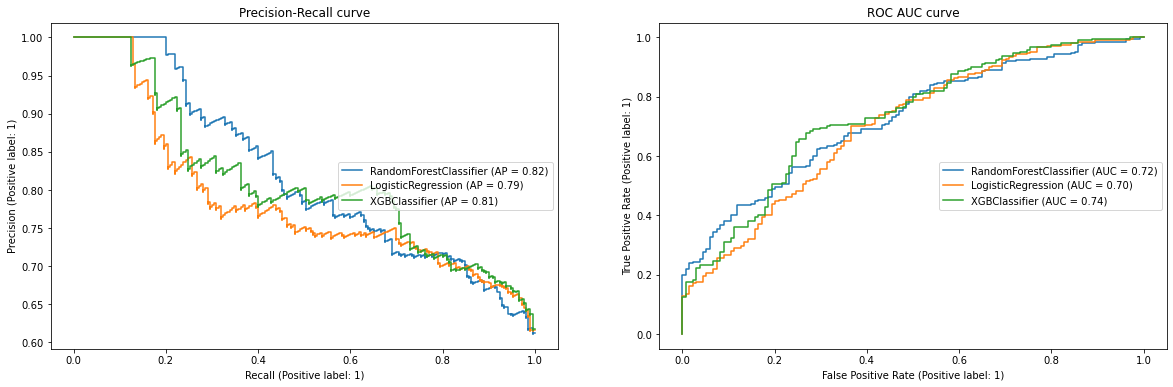

In [305]:
testa_modelos(X_train_t, y_train_t, X_test_t, y_test_t)

In [306]:
#Achando melhores hiperparâmetros com hyperopt para logistic regression
           
#Define Parameter Space for Optimization
space = {
    'C': hp.choice('C', [0.001, 0.01, 0.1, 1, 10, 100, 1000]),
    'penalty': hp.choice('penalty', ['l1']),
    'max_iter': hp.quniform('max_iter', 100, 700, 100),
    'solver': hp.choice('solver', ['liblinear', 'saga']), #tirei 'lbfgs' e'sag' pq não funciona com l1
    'class_weight' : hp.choice('class_weight', ['balanced', None])
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    clf = LogisticRegression(**params, random_state=42, n_jobs=-1)
    f1 = cross_val_score(clf, X_train_t, y_train_t, cv=10, scoring='accuracy', error_score='raise').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=20, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 20/20 [02:04<00:00,  6.21s/trial, best loss: -0.6645679012345678]
Best: {'C': 2, 'class_weight': 1, 'max_iter': 600.0, 'penalty': 0, 'solver': 0}


In [307]:
#Achando melhores hiperparâmetros com hyperopt para Random Forest

#Define Parameter Space for Optimization
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500]),
    "max_depth": hp.quniform("max_depth", 2, 24, 2),
    "max_features": hp.choice("max_features", ['auto', 'sqrt', 'log2']),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "min_samples_leaf":hp.choice("min_samples_leaf", [1, 2, 3, 4, 5]),
    "min_samples_split":hp.choice("min_samples_split", [2, 3, 4, 5, 6]),
    "class_weight": hp.choice("class_weight", ['balanced', 'balanced_subsample', None]),
    "bootstrap": hp.choice("bootstrap", [True, False])
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    model = RandomForestClassifier(**params, n_jobs=-1)
    f1 = cross_val_score(model, X_train_t, y_train_t, cv = 10, scoring='accuracy', error_score='raise').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=20, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 20/20 [02:30<00:00,  7.53s/trial, best loss: -0.6919444444444445]
Best: {'bootstrap': 1, 'class_weight': 0, 'criterion': 1, 'max_depth': 18.0, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 3}


CrossValMean: 0.6844598765432098
CrossValSTD: 0.03322391807541162
accuracy: 68.90% | precision: 71.73% | recall: 80.95% | f1: 76.06%


Text(0.5, 1.0, 'ROC AUC curve')

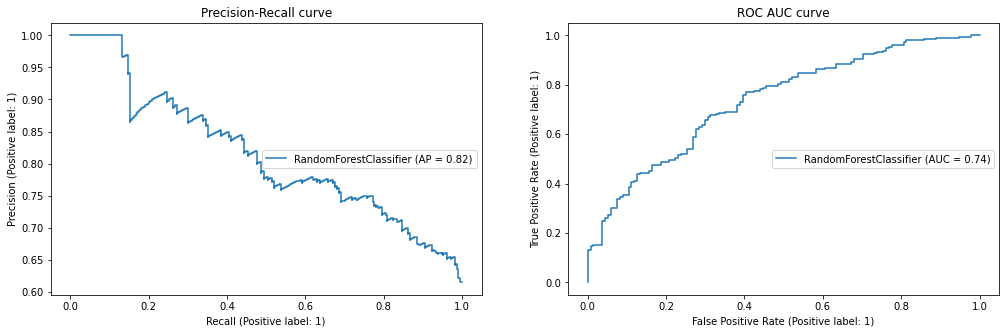

In [308]:
rf = RandomForestClassifier(
    n_estimators=[100, 200, 300, 400,500][best['n_estimators']],
    max_depth=best['max_depth'],
    max_features=['auto', 'sqrt', 'log2'][best['max_features']],
    criterion=["gini", "entropy"][best['criterion']],
    min_samples_leaf=[1, 2, 3, 4, 5][best['min_samples_leaf']],
    min_samples_split=[2, 3, 4, 5, 6][best['min_samples_split']],
    random_state=42,
    class_weight=['balanced', 'balanced_subsample', None][best['class_weight']],
    bootstrap=[True, False][best['bootstrap']],
    n_jobs = -1)

cv = cross_val_score(rf,X_train_t,y_train_t, cv = 10 , scoring='accuracy')

CrossValMean = cv.mean()
print("CrossValMean:", CrossValMean)
CrossValSTD = cv.std()
print("CrossValSTD:", CrossValSTD)

rf.fit(X_train_t, y_train_t)
y_pred = rf.predict(X_test_t)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,5))
accuracy, precision, recall, f1 = evaluation_metrics(rf, X_test_t ,y_test_t, y_pred, ax1, ax2)
print(f"accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
ax1.legend(loc="right")
ax1.set_title('Precision-Recall curve')

ax2.legend(loc="right")
ax2.set_title('ROC AUC curve')

In [309]:
#Achando melhores hiperparâmetros com hyperopt para XGBoosting

#Define Parameter Space for Optimization
space = {
 'max_depth' : hp.choice('max_depth', range(5, 15, 1)),
 'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
 'n_estimators' : hp.choice('n_estimators', range(50, 400, 10)),
 'gamma' : hp.quniform('gamma', 0, 0.30, 0.01),
 'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
 'subsample' : hp.quniform('subsample', 0.1, 1, 0.05),
 'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
 'scale_pos_weight' : hp.choice('scale_pos_weight', range(4, 25, 1)),
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    clf = XGBClassifier(**params, random_state=42, verbosity=0, objective= 'binary:logistic', n_jobs=-1)
    f1 = cross_val_score(clf, X_train_t, y_train_t, cv=10, scoring='accuracy').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=20, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 20/20 [01:25<00:00,  4.29s/trial, best loss: -0.6732716049382717]
Best: {'colsample_bytree': 0.46, 'gamma': 0.09, 'learning_rate': 0.31, 'max_depth': 8, 'min_child_weight': 3.0, 'n_estimators': 5, 'scale_pos_weight': 5, 'subsample': 0.75}


CrossValMean: 0.6570987654320988
CrossValSTD: 0.042642717419035844
accuracy: 69.19% | precision: 68.57% | recall: 91.43% | f1: 78.37%


Text(0.5, 1.0, 'ROC AUC curve')

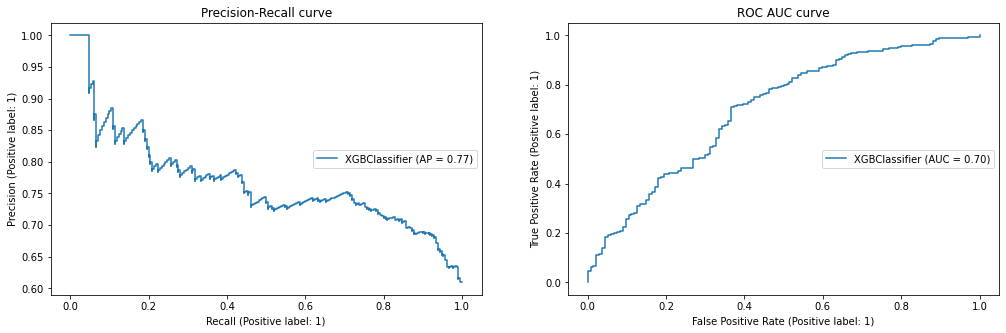

In [310]:
xgb = XGBClassifier(
    learning_rate=best['learning_rate'],
    n_estimators=range(50, 400, 10)[best['n_estimators']],
    max_depth=range(5, 15, 1)[best['max_depth']],
    min_child_weight=best['min_child_weight'],
    gamma=best['gamma'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    objective= 'binary:logistic',
    scale_pos_weight=range(4, 25, 1)[best['scale_pos_weight']])

cv = cross_val_score(xgb,X_train_t,y_train_t, cv = 10 , scoring='accuracy')

CrossValMean = cv.mean()
print("CrossValMean:", CrossValMean)
CrossValSTD = cv.std()
print("CrossValSTD:", CrossValSTD)

xgb.fit(X_train_t, y_train_t)
y_pred = xgb.predict(X_test_t)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,5))
accuracy, precision, recall, f1 = evaluation_metrics(xgb, X_test_t ,y_test_t, y_pred, ax1, ax2)
print(f"accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
ax1.legend(loc="right")
ax1.set_title('Precision-Recall curve')

ax2.legend(loc="right")
ax2.set_title('ROC AUC curve')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

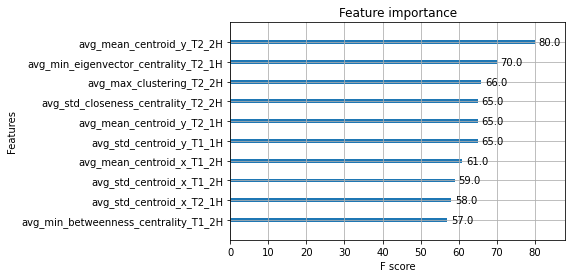

In [255]:
#Feature importance do modelo escolhido
plot_importance(xgb, max_num_features = 10)

## Treinar por campeonatos

### England

RandomForest: accuracy: 64.29% | precision: 67.86% | recall: 84.44% | f1: 75.25%
LogisticRegression: accuracy: 67.14% | precision: 76.19% | recall: 71.11% | f1: 73.56%
XGBClassifier: accuracy: 75.71% | precision: 74.14% | recall: 95.56% | f1: 83.50%


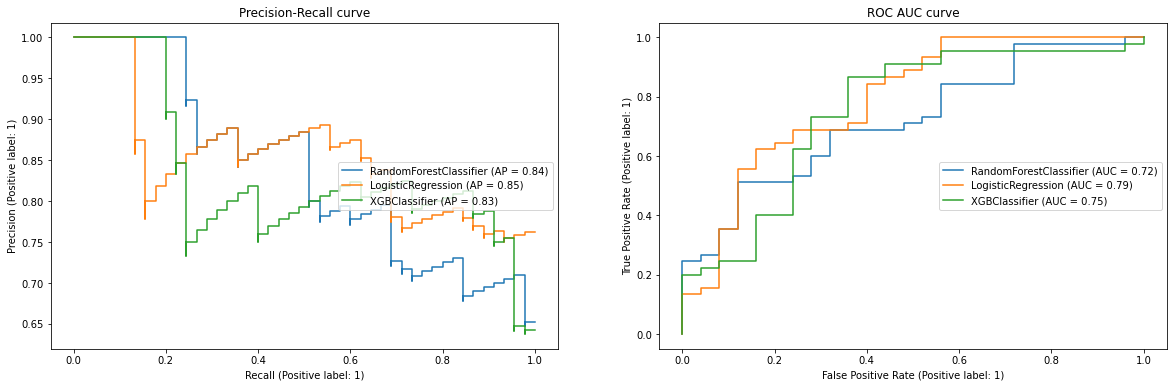

In [311]:
#Separando dados e target
X = avg_eng.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_eng['winner'] 
col_names = X.columns
idx = avg_df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(XScaled,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)

testa_modelos(X_train, y_train, X_test, y_test)

### France

RandomForest: accuracy: 52.86% | precision: 60.42% | recall: 67.44% | f1: 63.74%
LogisticRegression: accuracy: 57.14% | precision: 67.57% | recall: 58.14% | f1: 62.50%
XGBClassifier: accuracy: 61.43% | precision: 64.29% | recall: 83.72% | f1: 72.73%


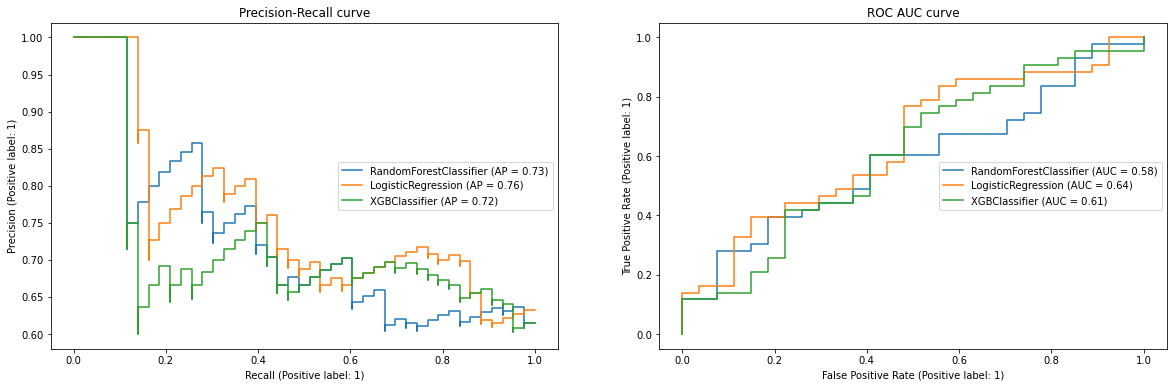

In [312]:
#Separando dados e target
X = avg_fra.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_fra['winner'] 
col_names = X.columns
idx = avg_df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(XScaled,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)

testa_modelos(X_train, y_train, X_test, y_test)

### Germany

RandomForest: accuracy: 61.82% | precision: 65.85% | recall: 79.41% | f1: 72.00%
LogisticRegression: accuracy: 65.45% | precision: 74.19% | recall: 67.65% | f1: 70.77%
XGBClassifier: accuracy: 61.82% | precision: 63.83% | recall: 88.24% | f1: 74.07%


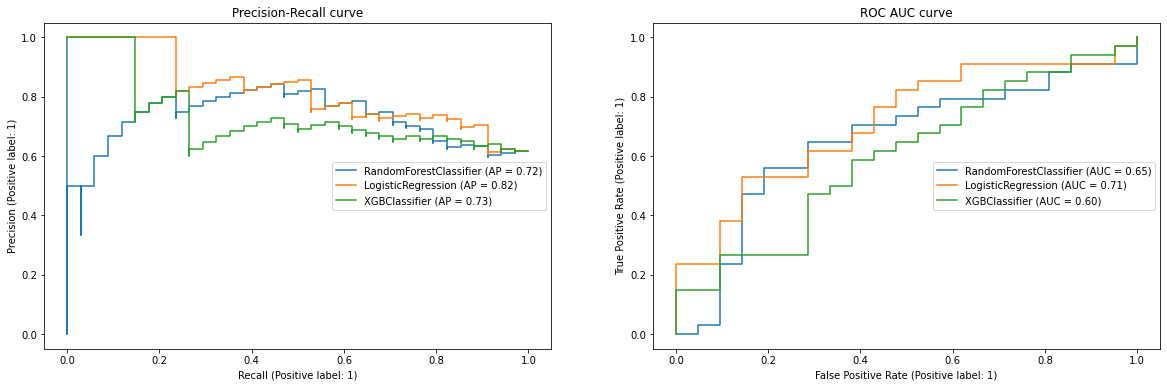

In [313]:
#Separando dados e target
X = avg_ger.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_ger['winner'] 
col_names = X.columns
idx = avg_df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(XScaled,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)

testa_modelos(X_train, y_train, X_test, y_test)

### Italy

RandomForest: accuracy: 66.67% | precision: 69.05% | recall: 70.73% | f1: 69.88%
LogisticRegression: accuracy: 68.00% | precision: 71.79% | recall: 68.29% | f1: 70.00%
XGBClassifier: accuracy: 65.33% | precision: 63.64% | recall: 85.37% | f1: 72.92%


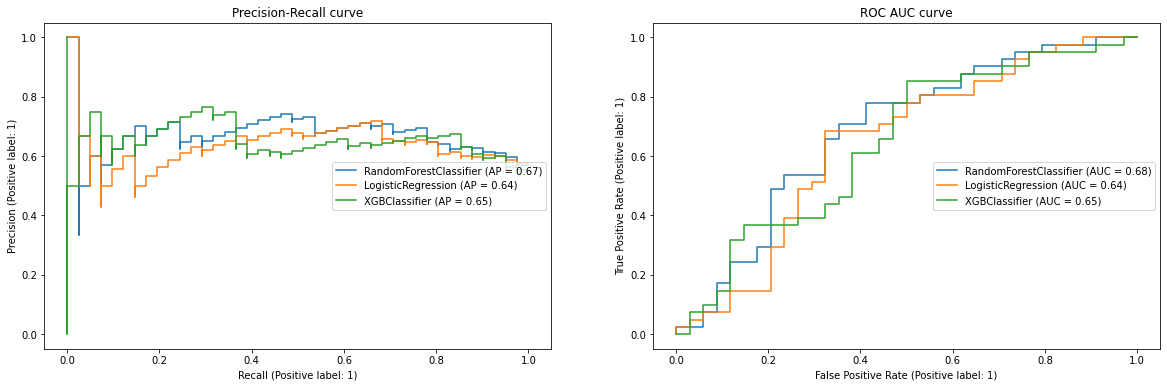

In [314]:
#Separando dados e target
X = avg_ita.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_ita['winner'] 
col_names = X.columns
idx = avg_df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(XScaled,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)

testa_modelos(X_train, y_train, X_test, y_test)

### Spain

RandomForest: accuracy: 63.51% | precision: 67.27% | recall: 80.43% | f1: 73.27%
LogisticRegression: accuracy: 63.51% | precision: 74.36% | recall: 63.04% | f1: 68.24%
XGBClassifier: accuracy: 70.27% | precision: 68.75% | recall: 95.65% | f1: 80.00%


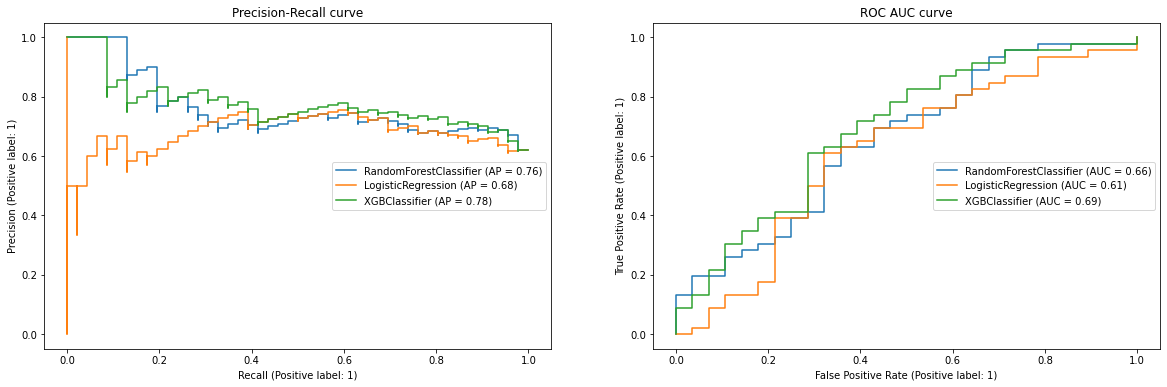

In [315]:
#Separando dados e target
X = avg_spa.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_spa['winner'] 
col_names = X.columns
idx = avg_df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(XScaled,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)

testa_modelos(X_train, y_train, X_test, y_test)

# Clustering

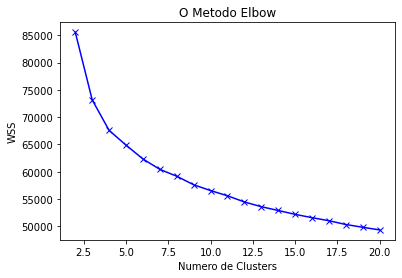

In [359]:
# Clustering

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2
# y_pca = X['winner']
# x_pca = X.drop(['winner'], axis=1)
wcss = calculate_wcss(X_pca)
plt.figure(figsize=(6,4))
plt.plot(range(2, 21), wcss, 'bx-')
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [360]:
best_n_cluster = optimal_number_of_clusters(wcss)
best_n_cluster

6

For n_clusters = 2 The average silhouette_score is : 0.1578286276268467
For n_clusters = 3 The average silhouette_score is : 0.15131257048987962
For n_clusters = 4 The average silhouette_score is : 0.13015946454930163
For n_clusters = 5 The average silhouette_score is : 0.11202940451307847
For n_clusters = 6 The average silhouette_score is : 0.09515308380397582
For n_clusters = 7 The average silhouette_score is : 0.08830648962591531


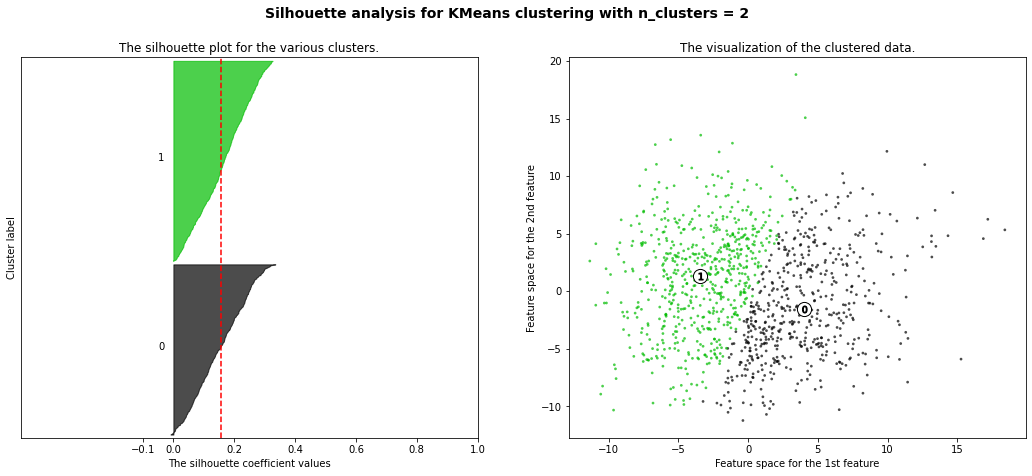

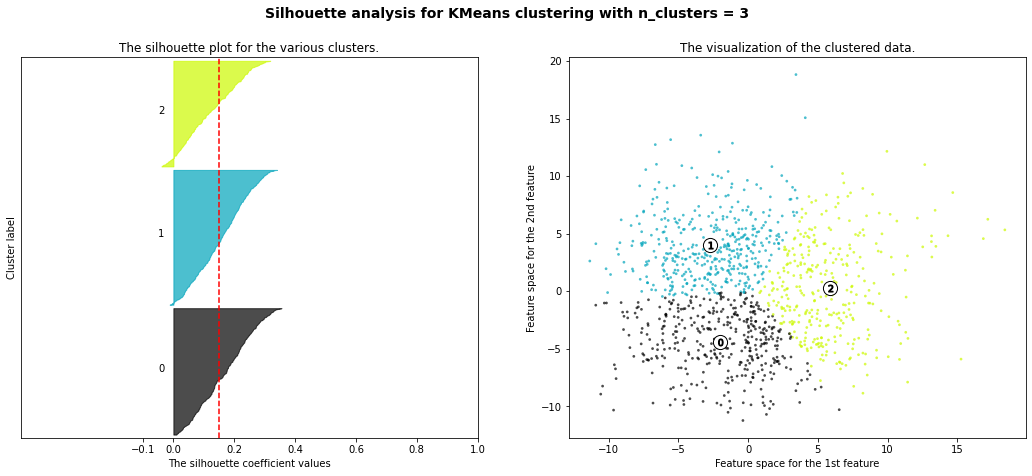

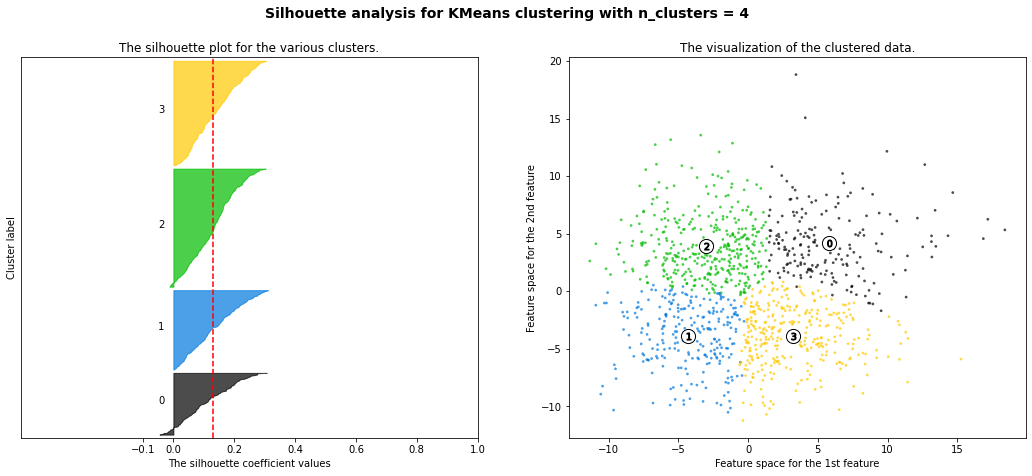

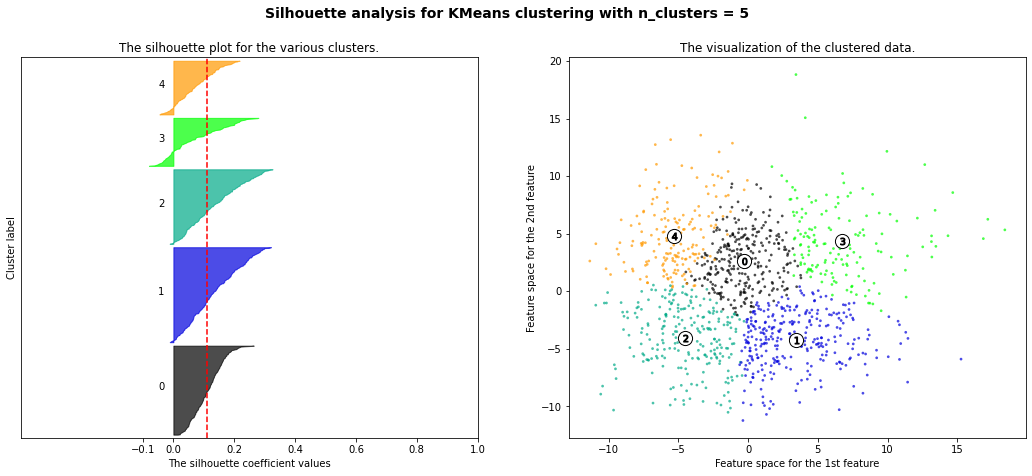

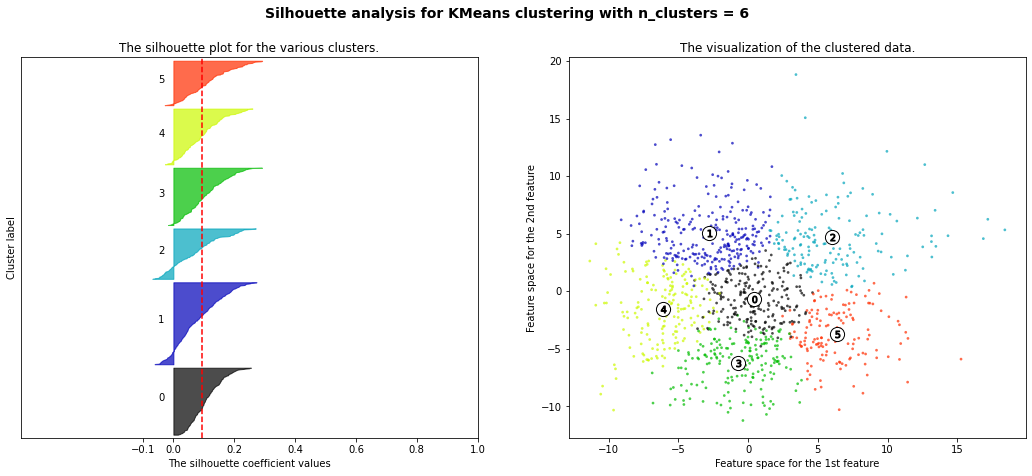

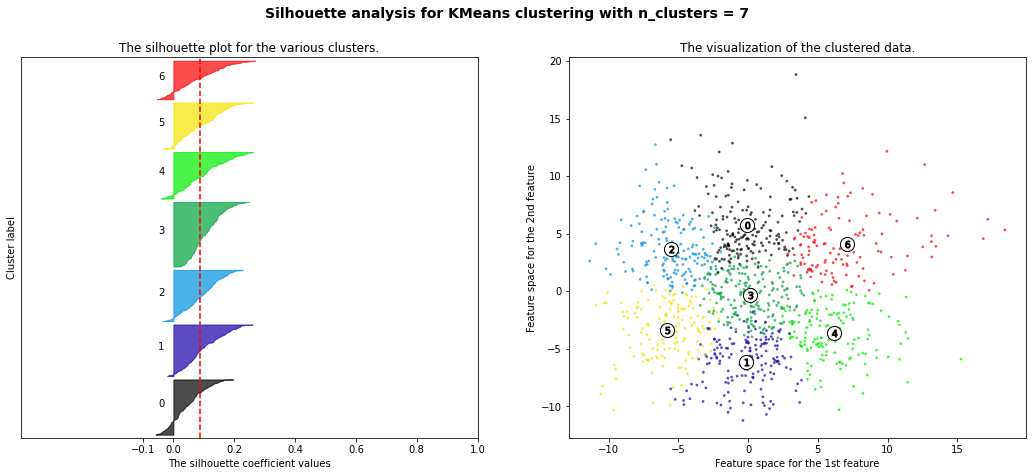

In [361]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

sc_df = pd.DataFrame(data = XScaled, columns=col_names)

pca_df.drop(['tournament'], axis=1, inplace=True)

for n_clusters in range(2, 8):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.5, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, 
    # to demarcate them clearly.
    ax1.set_ylim([0, len(pca_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pca_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

plt.show()

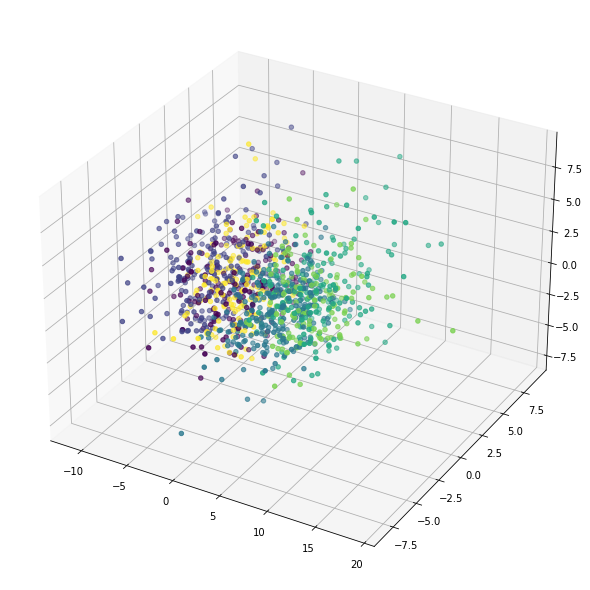

In [370]:
df_merge_col_values = pd.DataFrame(pca_df).values

kmeans = KMeans(n_clusters = 6, n_jobs = -1, max_iter= 400)
kmeans = kmeans.fit(pca_df)
k_means_predicted = kmeans.predict(pca_df)

# Getting the cluster centers
C = kmeans.cluster_centers_
# Getting the distance
distance = kmeans.fit_transform(pca_df)
# Getting the labels
labels = kmeans.labels_
# Plotando
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.scatter(df_merge_col_values[:, 1], df_merge_col_values[:, 2], df_merge_col_values[:,3], c=k_means_predicted)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='', s=1000)
plt.show()

In [371]:
# Marcar a previsão = 1
k_means_predicted = pd.DataFrame(k_means_predicted)
# Inserir na base full
X_kmeans = pca_df.copy()
X_kmeans['cluster'] = k_means_predicted
X_kmeans['tournament'] = avg_df_t['tournament']

In [372]:
X_kmeans.groupby(['cluster', 'tournament']).count()

PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  \
cluster tournament                                                           
0       England                 28   28   28   28   28   28   28   28   28   
        France                  35   35   35   35   35   35   35   35   35   
        Germany                 31   31   31   31   31   31   31   31   31   
        Italy                   48   48   48   48   48   48   48   48   48   
        Spain                   39   39   39   39   39   39   39   39   39   
1       England                 39   39   39   39   39   39   39   39   39   
        France                  34   34   34   34   34   34   34   34   34   
        Germany                 57   57   57   57   57   57   57   57   57   
        Italy                   47   47   47   47   47   47   47   47   47   
        Spain                   39   39   39   39   39   39   39   39   39   
        World_Cup                3    3    3    3    3    3    3    3    3   
2       England                 40   40   40   40   40   40   40   40   40   
        European_Championship    1    1    1    1    1    1    1    1    1   
        France                  69   69   69   69   69   69   69   69   69   
        Germany                 52   52   52   52   52   52   52   52   52   
        Italy                   62   62   62   62   62   62   62   62   62   
        Spain                   31   31   31   31   31   31   31   31   31   
        World_Cup                2    2    2    2    2    2    2    2    2   
3       England                 46   46   46   46   46   46   46   46   46   
        European_Championship    1    1    1    1    1    1    1    1    1   
        France                  23   23   23   23   23   23   23   23   23   
        Germany                 12   12   12   12   12   12   12   12   12   
        Italy                   35   35   35   35   35   35   35   35   35   
        Spain                   63   63   63   63   63   63   63   63   63   
4       England                 47   47   47   47   47   47   47   47   47   
        France                  27   27   27   27   27   27   27   27   27   
        Germany                  9    9    9    9    9    9    9    9    9   
        Italy                   25   25   25   25   25   25   25   25   25   
        Spain                   37   37   37   37   37   37   37   37   37   
5       England                 31   31   31   31   31   31   31   31   31   
        France                  43   43   43   43   43   43   43   43   43   
        Germany                 20   20   20   20   20   20   20   20   20   
        Italy                   33   33   33   33   33   33   33   33   33   
        Spain                   36   36   36   36   36   36   36   36   36   
        World_Cup                1    1    1    1    1    1    1    1    1   

                               PC10  PC11  PC12  PC13  PC14  PC15  PC16  PC17  \
cluster tournament                                                              
0       England                  28    28    28    28    28    28    28    28   
        France                   35    35    35    35    35    35    35    35   
        Germany                  31    31    31    31    31    31    31    31   
        Italy                    48    48    48    48    48    48    48    48   
        Spain                    39    39    39    39    39    39    39    39   
1       England                  39    39    39    39    39    39    39    39   
        France                   34    34    34    34    34    34    34    34   
        Germany                  57    57    57    57    57    57    57    57   
        Italy                    47    47    47    47    47    47    47    47   
        Spain                    39    39    39    39    39    39    39    39   
        World_Cup                 3     3     3     3     3     3     3     3   
2       England                  40    40    40    40    40    40    40    40   
        Eu

In [373]:
X_kmeans.groupby(['tournament', 'cluster']).count()

PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  \
tournament            cluster                                                
England               0         28   28   28   28   28   28   28   28   28   
                      1         39   39   39   39   39   39   39   39   39   
                      2         40   40   40   40   40   40   40   40   40   
                      3         46   46   46   46   46   46   46   46   46   
                      4         47   47   47   47   47   47   47   47   47   
                      5         31   31   31   31   31   31   31   31   31   
European_Championship 2          1    1    1    1    1    1    1    1    1   
                      3          1    1    1    1    1    1    1    1    1   
France                0         35   35   35   35   35   35   35   35   35   
                      1         34   34   34   34   34   34   34   34   34   
                      2         69   69   69   69   69   69   69   69   69   
                      3         23   23   23   23   23   23   23   23   23   
                      4         27   27   27   27   27   27   27   27   27   
                      5         43   43   43   43   43   43   43   43   43   
Germany               0         31   31   31   31   31   31   31   31   31   
                      1         57   57   57   57   57   57   57   57   57   
                      2         52   52   52   52   52   52   52   52   52   
                      3         12   12   12   12   12   12   12   12   12   
                      4          9    9    9    9    9    9    9    9    9   
                      5         20   20   20   20   20   20   20   20   20   
Italy                 0         48   48   48   48   48   48   48   48   48   
                      1         47   47   47   47   47   47   47   47   47   
                      2         62   62   62   62   62   62   62   62   62   
                      3         35   35   35   35   35   35   35   35   35   
                      4         25   25   25   25   25   25   25   25   25   
                      5         33   33   33   33   33   33   33   33   33   
Spain                 0         39   39   39   39   39   39   39   39   39   
                      1         39   39   39   39   39   39   39   39   39   
                      2         31   31   31   31   31   31   31   31   31   
                      3         63   63   63   63   63   63   63   63   63   
                      4         37   37   37   37   37   37   37   37   37   
                      5         36   36   36   36   36   36   36   36   36   
World_Cup             1          3    3    3    3    3    3    3    3    3   
                      2          2    2    2    2    2    2    2    2    2   
                      5          1    1    1    1    1    1    1    1    1   

                               PC10  PC11  PC12  PC13  PC14  PC15  PC16  PC17  \
tournament            cluster                                                   
England               0          28    28    28    28    28    28    28    28   
                      1          39    39    39    39    39    39    39    39   
                      2          40    40    40    40    40    40    40    40   
                      3          46    46    46    46    46    46    46    46   
                      4          47    47    47    47    47    47    47    47   
                      5          31    31    31    31    31    31    31    31   
European_Championship 2           1     1     1     1     1     1     1     1   
                      3           1     1     1     1     1     1     1     1   
France                0          35    35    35    35    35    35    35    35   
                      1          34    34    34    34    34    34    34    34   
                      2          69    69    69    69    69    69    69    69   
                      3          23    23    23    23    23    23    23    23   
          

# PCA

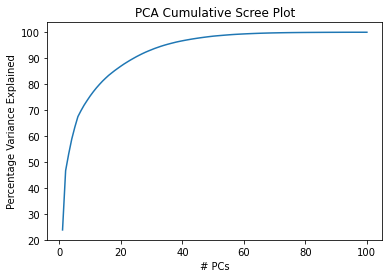

In [349]:
# PCA

pca = PCA()
pca.fit(XScaled_t)
X_pca = pca.fit_transform(XScaled_t)

y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,len(pca.explained_variance_)+1)
plt.plot(x,y)
plt.ylabel('Percentage Variance Explained')
plt.xlabel('# PCs')
plt.title('PCA Cumulative Scree Plot')
plt.show()

In [350]:
np.cumsum(pca.explained_variance_ratio_)


array([0.23776621, 0.46619516, 0.53086676, 0.5882381 , 0.63412989,
       0.67474113, 0.69758024, 0.71857574, 0.73692124, 0.75448624,
       0.77046896, 0.7852741 , 0.79873614, 0.81142866, 0.82287206,
       0.83373107, 0.84323037, 0.85251292, 0.86109846, 0.86949198,
       0.87755834, 0.88495956, 0.89219501, 0.89894037, 0.90559054,
       0.91171548, 0.91761909, 0.9231227 , 0.92814801, 0.9329087 ,
       0.93762327, 0.94179093, 0.94589832, 0.94961222, 0.95302996,
       0.95620496, 0.95920302, 0.96216012, 0.96470167, 0.96710183,
       0.96935366, 0.97148274, 0.97355099, 0.97543916, 0.97722534,
       0.97893887, 0.98054942, 0.98206675, 0.98351785, 0.98487965,
       0.9860285 , 0.98704826, 0.98805604, 0.98902971, 0.98994508,
       0.99083646, 0.99162901, 0.99230471, 0.99293323, 0.99353719,
       0.9941096 , 0.99461397, 0.9951001 , 0.99555378, 0.99599085,
       0.99637839, 0.99670881, 0.99703582, 0.99732518, 0.99757087,
       0.99780819, 0.99803178, 0.99822732, 0.99840946, 0.99856

In [351]:
#Escolho o número de componentes baseado na variância acumalada desejada
cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >= 0.9) + 1
d

25

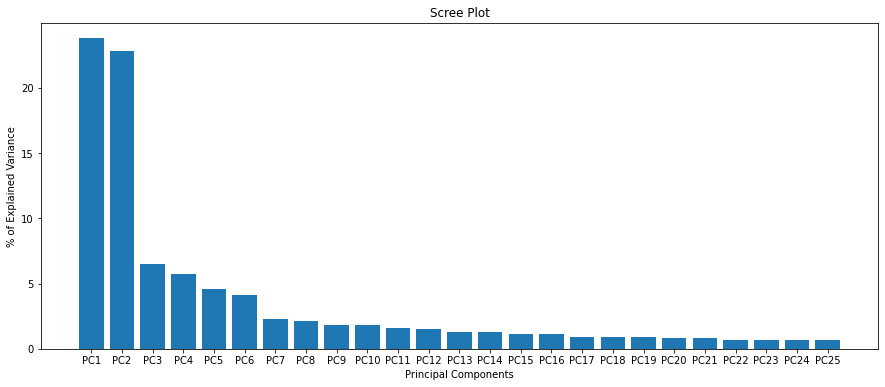

In [356]:
pca = PCA(n_components=d)
pca.fit(XScaled_t)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

X_pca = pca.fit_transform(XScaled_t)
pca_df = pd.DataFrame(data = X_pca, columns=labels)
pca_df['tournament'] = avg_df['tournament']

plt.figure(figsize = (15, 6))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [357]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,tournament
0,3.785862,1.149640,-5.985203,-1.341283,-2.397999,0.412227,-1.083490,-0.839873,-0.010335,0.997831,-1.375736,-0.471690,-1.050114,-2.086788,-0.659759,-0.460011,0.353937,0.474661,1.090967,-2.645360,-0.440287,0.501893,1.126652,1.138166,-0.930316,Germany
1,3.322232,-1.634187,-4.365087,-1.018069,0.041882,0.306778,-0.818221,-0.256655,-0.719045,1.698041,-1.041239,-1.004682,-0.700036,-2.529393,-0.913828,1.028902,1.053988,1.113523,0.298418,0.289729,-1.224945,-0.442301,1.038123,1.570476,-0.478088,Germany
2,3.349082,2.625497,-3.381368,0.464358,-1.515731,-0.638633,-2.271617,-1.266224,2.201355,2.031771,-0.742959,-1.387203,-1.522260,-0.680207,0.515829,0.148492,1.448706,-0.606910,-0.845586,-0.181403,-0.619111,-1.143692,-0.160415,1.036755,-0.496647,Germany
3,2.142554,5.990377,-0.906129,2.171882,0.939859,1.343896,-1.207311,-0.793826,-0.911198,0.707865,0.112831,-1.296625,-0.082570,-1.369808,0.039354,-0.237211,-0.780851,-0.594211,0.758296,1.282912,-1.338384,-1.922125,1.367984,0.432396,0.519155,Germany
4,2.760276,-0.338869,-2.688133,-3.249346,3.545799,1.859677,-2.776665,-0.617371,-0.821954,1.592703,3.548630,-2.045436,-0.719354,-0.691609,-0.402724,1.674285,0.065664,-0.201249,-0.695880,-0.331601,-0.889887,-0.353435,0.614210,0.441580,-0.617556,Germany


avg_avg_closeness_centrality_T1_2H     -0.189914
avg_avg_degree_centrality_T1_2H        -0.189280
avg_avg_degree_centrality_T1_1H        -0.187879
avg_avg_betweenness_centrality_T1_2H    0.187690
avg_avg_betweenness_centrality_T1_1H    0.187296
avg_avg_closeness_centrality_T1_1H     -0.186526
avg_avg_shortest_path_T1_1H             0.185451
avg_min_clustering_T1_2H               -0.184477
avg_avg_shortest_path_T1_2H             0.182811
avg_min_clustering_T1_1H               -0.182217
dtype: float64


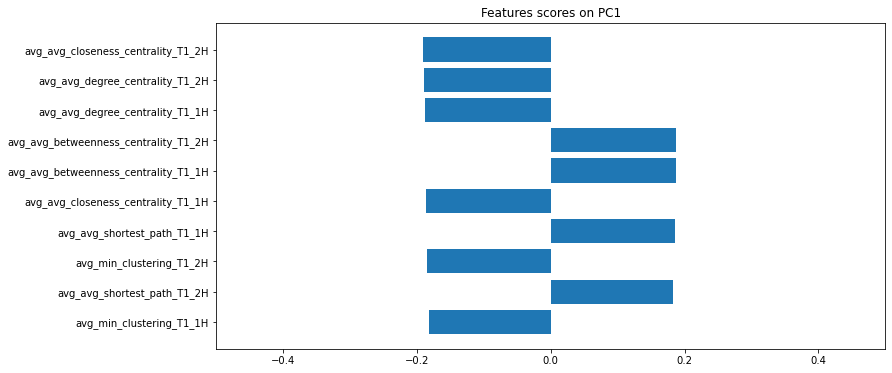

In [358]:
## get the name of the top 10 measurements that contribute most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=X_t.columns)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 features
top_10_features = sorted_loading_scores[:10].index.values
 
print(loading_scores[top_10_features])

plt.figure(figsize = (12, 6))
plt.xlim([-0.5, 0.5])
plt.barh(top_10_features[::-1], loading_scores[top_10_features][::-1])
plt.title('Features scores on PC1')
plt.show()